# Wind Turbine Fault Detection Study

### Introduction and Objective

The purpose of this notebook is to develop machine learning models that can predict various faults in wind turbines. This is a classification problem where the goal is to accurately classify the type of fault occurring in the turbine based on operational data. By accurately identifying potential faults, maintenance can be better planned, reducing downtime and improving the efficiency of wind energy production.

### Dataset Overview

The dataset consists of SCADA (Supervisory Control and Data Acquisition) measurements collected from a wind turbine over a year, from April 2014 to April 2015. These measurements provide a detailed view of the turbine's operational environment and include various parameters such as:

- **Reactive Power**: Measures the power that does not perform any useful work but is necessary to maintain voltage levels.
- **Blade Angles**: Positions of the wind turbine blades which affect the turbine's efficiency.
- **Nacelle Position**: The orientation of the turbine's housing that contains the generator, gearbox, and other components.
- **Temperatures**: Recorded at critical points such as bearings, rotors, and stators to monitor heat levels.
- **Wind Speeds**: Includes minimum, maximum, and average wind speeds, which are crucial for understanding the turbine's operational conditions.
- **Status Data**: Logs that provide insights into the turbine's operational state, including main status, sub-status, fault messages, and service records.

### Dataset Features

The dataset includes several key features that help in understanding the turbine's performance and diagnosing faults:

- **Error**: Indicates the occurrence of faults in the wind turbine system.
- **Wind Speed Variables**: 'WEC: ava. windspeed', 'WEC: max. windspeed', 'WEC: min. windspeed' - these represent the available, maximum, and minimum wind speeds.
- **Rotation Variables**: 'WEC: ava. Rotation', 'WEC: max. Rotation', 'WEC: min. Rotation' - these provide information about the turbine's rotational behavior.
- **Power Variables**: 'WEC: ava. Power', 'WEC: max. Power', 'WEC: min. Power' - these denote the available, maximum, and minimum power generated by the wind turbine.
- **Operating and Production Metrics**: 'WEC: Operating Hours', 'WEC: Production kWh', 'WEC: Production minutes' - these offer insights into the turbine's operating hours and energy production.
- **Reactive Power Variables**: 'WEC: ava. reactive Power', 'WEC: max. reactive Power', 'WEC: min. reactive Power' - these indicate the availability, maximum, and minimum reactive power.
- **Available Power Categories**: 'WEC: ava. available P from wind', 'WEC: ava. available P technical reasons', 'WEC: ava. Available P force majeure reasons', 'WEC: ava. Available P force external reasons' - these categorize available power based on various factors such as wind conditions, technical issues, force majeure events, and external reasons.
- **Blade Angle**: 'WEC: ava. blade angle A' - the angle of blade A, an essential parameter for turbine operation.
- **Temperature Variables**: Various temperatures across different components like inverters, rotors, stators, and the nacelle, providing insights into the temperature distribution within the wind turbine.

### Additional Library Installation

To enhance the functionality of the CTPO environment, you may need to install some libraries not pre-installed but required for this notebook. Follow these steps to install the necessary libraries from the requirements.txt file:

**1. Create and Activate the Virtual Environment:**

Open your terminal or command prompt within the jupyter notebook. `File -> New -> Terminal`

Navigate to the project directory where you want to set up the environment.

```sh
cd /path/to/your/project/directory
pwd
```

Execute the following commands to create and activate the virtual environment:

` bash`

` python3 -m venv --system-site-packages myvenv`

`source myvenv/bin/activate`

`pip3 install ipykernel`

`python -m ipykernel install --user --name=myvenv --name=myvenv --display-name="Python (myvenv)"` 

**2. Install Required libraries:**

Before running the following commands, make sure you are in the directory where the Jupyter Notebook is located. This ensures the `./` path is always current. You can use the cd command to change to your project directory and pwd to verify your current directory.


In [1]:
!. ./myvenv/bin/activate; pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.dates as mdates
from imblearn.over_sampling import SMOTE
from collections import Counter

In [3]:
ls ./wind_turbine_data/

fault_data.csv  scada_data.csv  status_data.csv


In [4]:
fault_data = pd.read_csv("./wind_turbine_data/fault_data.csv", parse_dates=["DateTime"], index_col="DateTime")
scada_data = pd.read_csv("./wind_turbine_data/scada_data.csv", parse_dates=["DateTime"], index_col="DateTime")
status_data = pd.read_csv("./wind_turbine_data/status_data.csv", parse_dates=["Time"], dayfirst=True, index_col="Time")

In [5]:
fault_data.head()

,Time,Fault
DateTime,,
2014-05-14 14:39:44,1.400096e+09,GF
2014-05-14 14:50:24,1.400097e+09,GF
2014-05-14 14:58:56,1.400098e+09,GF
2014-05-14 15:09:36,1.400098e+09,GF
2014-05-14 15:20:16,1.400099e+09,GF


In [6]:
scada_data.head()

,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.0,0.02,0.0,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.0,0.01,0.0,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.0,0.04,0.0,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.0,0.08,0.0,0,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.0,0.05,0.0,0,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713


In [7]:
status_data.head()

,Main Status,Sub Status,Full Status,Status Text,T,Service,FaultMsg,Value0
Time,,,,,,,,
2014-04-24 12:37:38,0,0,0 : 0,Turbine in operation,1,False,False,7.4
2014-04-25 19:27:24,71,104,71 : 104,Insulation monitoring : Insulation fault Phase U2,6,False,True,20.5
2014-04-26 09:30:13,8,0,8 : 0,Maintenance,6,True,False,17.1
2014-04-26 10:05:19,8,0,8 : 0,Maintenance,6,False,False,8.7
2014-04-26 10:05:25,8,0,8 : 0,Maintenance,6,True,False,10.6


In [8]:
fault_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2014-05-14 14:39:44 to 2015-01-15 23:09:20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    553 non-null    float64
 1   Fault   553 non-null    object 
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [9]:
scada_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49027 entries, 2014-05-01 00:00:00 to 2015-04-09 00:00:00
Data columns (total 65 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Time                                               49027 non-null  int64  
 1   Error                                              49027 non-null  int64  
 2   WEC: ava. windspeed                                49027 non-null  float64
 3   WEC: max. windspeed                                49027 non-null  float64
 4   WEC: min. windspeed                                49027 non-null  float64
 5   WEC: ava. Rotation                                 49027 non-null  float64
 6   WEC: max. Rotation                                 49027 non-null  float64
 7   WEC: min. Rotation                                 49027 non-null  float64
 8   WEC: ava. Power                                    

In [10]:
status_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1849 entries, 2014-04-24 12:37:38 to 2015-04-28 22:18:19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Main Status  1849 non-null   int64  
 1   Sub Status   1849 non-null   int64  
 2   Full Status  1849 non-null   object 
 3   Status Text  1849 non-null   object 
 4   T            1849 non-null   int64  
 5   Service      1849 non-null   bool   
 6   FaultMsg     1849 non-null   bool   
 7   Value0       1849 non-null   float64
dtypes: bool(2), float64(1), int64(3), object(2)
memory usage: 104.7+ KB


In [11]:
# check datasets sizes
print("Fault data shape:", fault_data.shape)
print("SCADA data shape:", scada_data.shape)
print("Status data shape:", status_data.shape)

Fault data shape: (553, 2)
SCADA data shape: (49027, 65)
Status data shape: (1849, 8)


#### Observation

The fault and status data contains less samples than the total SCADA data because they only include timestamps when a failure actually occured in the wind turbine, so we need to consider that we combining the fault features into the SCADA data.

In [12]:
# check for missing instances
print(f"Fault data missing instances count: {(fault_data.isna().sum()).sum()}")
print(f"SCADA data missing instances count: {(scada_data.isna().sum()).sum()}")
print(f"Status data missing instances count: {(status_data.isna().sum()).sum()}")

Fault data missing instances count: 0
SCADA data missing instances count: 0
Status data missing instances count: 0


In [13]:
# check datasets datetime ranges
print(f"Fault data datetime range from {fault_data.index[0]} to {fault_data.index[-1]}")
print(f"SCADA data datetime range from {scada_data.index[0]} to {scada_data.index[-1]}")
print(f"Status data datetime range from {status_data.index[0]} to {status_data.index[-1]}")

Fault data datetime range from 2014-05-14 14:39:44 to 2015-01-15 23:09:20
SCADA data datetime range from 2014-05-01 00:00:00 to 2015-04-09 00:00:00
Status data datetime range from 2014-04-24 12:37:38 to 2015-04-28 22:18:19


#### Observation

The status data is recorded on a larger datetime range compared to the SCADA data, so to combine the status values with the scada and fault datasets we will be forced to drop some of the additional status record that aren't presents in the two other datasets and thus our study datetime range will be from 2014-05-01 00:00:00 to 2015-04-09 00:00:00.

In [14]:
from datetime import datetime

print("Fault data date/time from DateTime:", fault_data.index[0])
print("Fault data date/time from Timestamp:", datetime.fromtimestamp(fault_data["Time"][0]))

Fault data date/time from DateTime: 2014-05-14 14:39:44
Fault data date/time from Timestamp: 2014-05-14 19:39:44


/tmp/ipykernel_1561/1919178566.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Fault data date/time from Timestamp:", datetime.fromtimestamp(fault_data["Time"][0]))


#### Observation

In both the fault and SCADA datasets it seems that the recorded datetime values are lagging 6 hours behind the recorded timestamp, and the status data contains the lagging datetime values. Because the timestamps records seems more accurate between the fault and SCADA datasets will using them as indexes, and we will have to change the status data timestamps later on.

In [15]:
# change the indexes using "TIME" timestamps
# convert to readable datetimes
fault_data.index = fault_data.Time.apply(lambda x: datetime.fromtimestamp(x))
fault_data = fault_data.drop(["Time"], axis=1)

scada_data.index = scada_data.Time.apply(lambda x: datetime.fromtimestamp(x))
scada_data = scada_data.drop(["Time"], axis=1)

In [16]:
# Check if there are missing values
print("Missing values in Fault data:", (fault_data.isna().sum()).sum())
print("Missing values in SCADA data:", (scada_data.isna().sum()).sum())
print("Missing values in Status data:", (status_data.isna().sum()).sum())

Missing values in Fault data: 0
Missing values in SCADA data: 0
Missing values in Status data: 0


#### Observation

Our data reveals five fault types, with "EF" and "FF" being more prevalent. This suggests that these fault types are likely the most frequently occurring in wind turbines. On the other hand, "MF," "GF," and "AF" faults are less prominent, indicating they may be rare or associated with critical failures in wind turbines, occurring only in extreme situations.

In [17]:
#Check for duplicated datetimes
print("Duplicated datetimes in Fault data:", (fault_data.index.duplicated()).sum())
print("Duplicated datetimes in SCADA data:", (scada_data.index.duplicated()).sum())
print("Duplicated datetimes in Status data:", (status_data.index.duplicated()).sum())

Duplicated datetimes in Fault data: 107
Duplicated datetimes in SCADA data: 6
Duplicated datetimes in Status data: 34


#### Observation

We observe duplicates in all our datasets, but it's important to note that they carry different significance. In the SCADA data, duplicated records can be easily eliminated. However, in the status and fault data, duplicated datetime records indicate instances when two or more fault types occur simultaneously in the wind turbine. These occurrences are crucial for our study.

To address datetime instances with multiple fault types, we will implement one-hot encoding for each fault type at a given datetime.

In [18]:
# drop duplicated instances in SCADA data
scada_data = scada_data[~scada_data.index.duplicated()]

### Check multiple faults occurances

In [19]:
faults = fault_data.groupby(fault_data.index)['Fault'].apply(lambda x: ','.join(x.astype(str)))
fault_classes = faults.str.get_dummies(sep=',')
fault_classes.set_index(faults.index)
fault_classes.head()

,AF,EF,FF,GF,MF
Time,,,,,
2014-05-14 19:39:44,0,0,0,1,0
2014-05-14 19:50:24,0,0,0,1,0
2014-05-14 19:58:56,0,0,0,1,0
2014-05-14 20:09:36,0,0,0,1,0
2014-05-14 20:20:16,0,0,0,1,0


In [20]:
# check which fault can occurs at the same time
fault_classes.apply(lambda x: f'{x["AF"]}{x["EF"]}{x["FF"]}{x["GF"]}{x["MF"]}', axis=1).value_counts()

00100    159
01100     95
01000     79
10000     50
00010     43
10001     12
00001      8
Name: count, dtype: int64

#### Observation

We observe occurrences where both "EF" and "FF" faults happen simultaneously in the wind turbine, as well as instances when "AF" and "MF" faults can occur simultaneously.

In [21]:
# we consider that all instances not present in fault are normal working conditions (No fault)
fault_column = fault_data[~fault_data.index.duplicated()].reindex(scada_data.index, fill_value="NF")

In [22]:
fault_column["Fault"].value_counts()

Fault
NF    48575
EF      174
FF      159
AF       62
GF       43
MF        8
Name: count, dtype: int64

#### Observation

We see now that the fault classes are highly imbalanced as the non fault class represent 99% of the data, seo for performing a classification task we will have to take a smaller sample for the non fault class and we need to use some rebalancing technique to add failure instances. We also notice that there is only 8 instances of MF fault which will give us problems when trying to train our models.

### Fault logs from status data

The status data contains the logs recorded during the wind turbine operations which inlude both normal working condition and when a failure occurs, we could considere adding those logs features to our global dataset but for the moment we will only work with fault and SCADA data.

## Exploratory data analysis

In [23]:
# combine fault data with scada data
combined_data = scada_data.merge(fault_column, on="Time", how="left")

In [24]:
combined_data.columns

Index(['Error', 'WEC: ava. windspeed', 'WEC: max. windspeed',
       'WEC: min. windspeed', 'WEC: ava. Rotation', 'WEC: max. Rotation',
       'WEC: min. Rotation', 'WEC: ava. Power', 'WEC: max. Power',
       'WEC: min. Power', 'WEC: ava. Nacel position including cable twisting',
       'WEC: Operating Hours', 'WEC: Production kWh',
       'WEC: Production minutes', 'WEC: ava. reactive Power',
       'WEC: max. reactive Power', 'WEC: min. reactive Power',
       'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inverter 1 cabinet temp.', 'Sys

In [25]:
# rename columns
combined_data.columns = ['Error', 'avg_ws', 'max_ws', 'min_ws', 'avg_rot', 'max_rot','min_rot',
                         'avg_power', 'max_power', 'min_power', 'avg_Nacel_position', 'Operating Hours',
                         'Production(kWh)', 'Production(min)', 'avg_reactive_power', 'max_reactive_power',
                         'min_reactive_power', 'avg_available_power_fw', 'avg_available_power_tr',
                         'avg_available_power_mr', 'avg_available_power_er', 'avg_blade_angle_A',
                         'temp_inverter11', 'temp_inverter12', 'temp_inverter13', 'temp_inverter14',
                         'temp_inverter15', 'temp_inverter16', 'temp_inverter17', 'temp_inverter21',
                         'temp_inverter22', 'temp_inverter23', 'temp_inverter24', 'temp_inverter25',
                         'temp_inverter26', 'temp_inverter27', 'temp_Spinner','temp_Front_bearing',
                         'temp_Rear_bearing', 'temp_Pitch_cabinet_blade_A', 'temp_Pitch_cabinet_blade_B',
                         'temp_Pitch_cabinet_blade_C', 'temp_Blade_A', 'temp_Blade_B', 'temp_Blade_C',
                         'temp_Rotor1', 'temp_Rotor2', 'temp_stator1', 'temp_stator2', 'temp_nacelle_ambient1',
                         'temp_nacelle_ambient2','temp_nacelle', 'temp_nacelle_cabinet', 'temp_main_carrier',
                         'temp_rectifier_cabinet', 'temp_yaw_inverter_cabinet', 'temp_fan_inverter_cabinet',
                         'temp_ambient', 'temp_tower', 'temp_control_cabinet', 'temp_Transformer', 'avg_RTU_setpoint1',
                         'Inverter averages', 'Inverter std dev', 'Fault']

In [26]:
# chech the Error column
combined_data["Error"].value_counts()

Error
0      48722
246      164
10        35
20        18
50        18
90        14
30        13
80         9
70         9
40         9
60         9
100        1
Name: count, dtype: int64

It seems that the Error column also indicates the type of fault that occures in the wind turbine, similair to the classes we've extracted above, so for a classification problem we must remove this column before training the models.

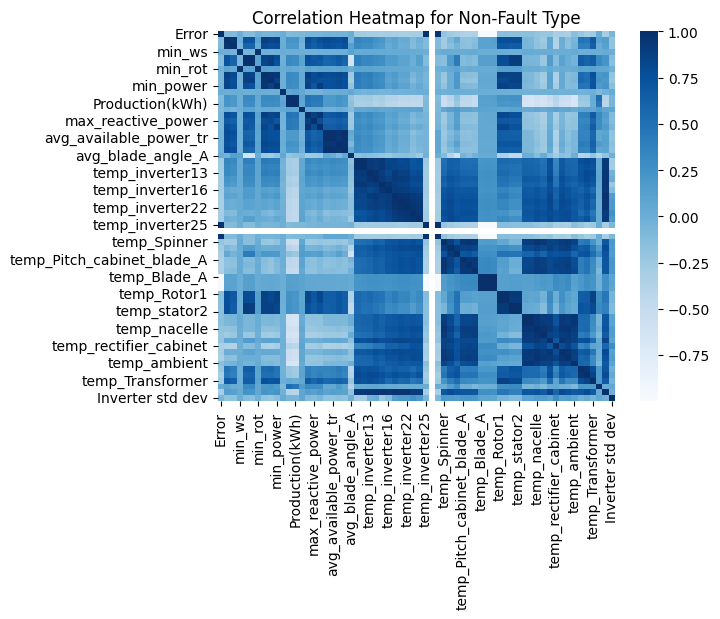

In [27]:
# Filtering data for a specific fault type for detailed correlation analysis
NF_fault_data = combined_data[combined_data['Fault'] == 'NF']
NF_fault_data = NF_fault_data.iloc[:, :-1]
corr_matrix = NF_fault_data.corr()

# Heatmap
sns.heatmap(corr_matrix,  cmap='Blues')
plt.title('Correlation Heatmap for Non-Fault Type')
plt.show()


Here are the key insights from the correlation heatmap of the wind turbine data that has no fault:

- **Variable Interaction**: There are strong correlations among temperature sensors (like inverter temperatures), suggesting that these components experience similar conditions or react similarly during turbine operations.

- **Power and Production**: The correlation between power output metrics (e.g., max and average power) and production is very strong, highlighting a direct relationship between operational efficiency and energy generation.

- **Independent Operations**: Lighter colored cells indicate low correlation between some operational variables (like min wind speed and error rates), suggesting independent influences on turbine performance, valuable for fault isolation and diagnostics.

- **Predictive Maintenance Potential**: High correlations between certain temperature variables and operational metrics could be utilized for predictive maintenance, optimizing the turbine's performance and longevity based on real-time data analytics.

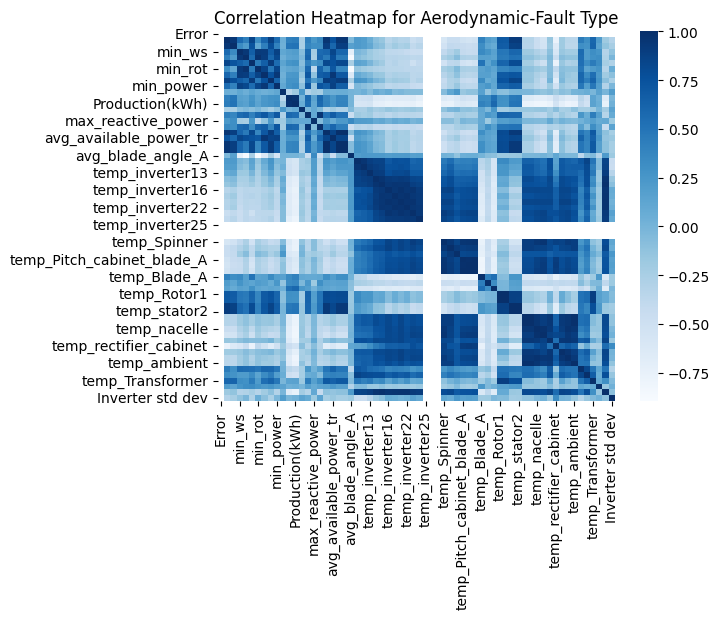

In [28]:
# Filtering data for a specific fault type for detailed correlation analysis
AF_fault_data = combined_data[combined_data['Fault'] == 'AF']
AF_fault_data = AF_fault_data.iloc[:, :-1]
corr_matrix = AF_fault_data.corr()

# Heatmap
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Heatmap for Aerodynamic-Fault Type')
plt.show()


The correlation heatmap for the Aerodynamic-Fault Type in our wind turbine dataset offers several insights. Here are some key interpretations based on the visual information:

- **Strong Interdependencies**: There are multiple areas of strong positive correlations, particularly among certain temperature variables and operational metrics (like rotor and blade temperatures). This indicates these variables are likely influenced by similar operational conditions or stress factors associated with aerodynamic faults.

- **Temperature Relationships**: The correlations between different temperature sensors, such as those in inverters and components like the rotor and blades, are highly positive. This suggests that during an aerodynamic fault, these components either heat up or cool down in tandem, potentially due to the increased mechanical strain or environmental influences.

- **Contrasting Variables**: There are distinct blocks of negative correlations, particularly visible between some of the power production metrics and certain temperatures. This could indicate that as production or power efficiency decreases, temperature in some components increases, possibly due to inefficiencies or faults in system operation causing excessive heating.

- **Operational Insights for Maintenance**: The patterns of correlation can be used to monitor and predict aerodynamic fault conditions. For example, an unexpected increase in correlation between normally independent variables like ambient temperature and rotor speed might signal the onset of an aerodynamic issue. 


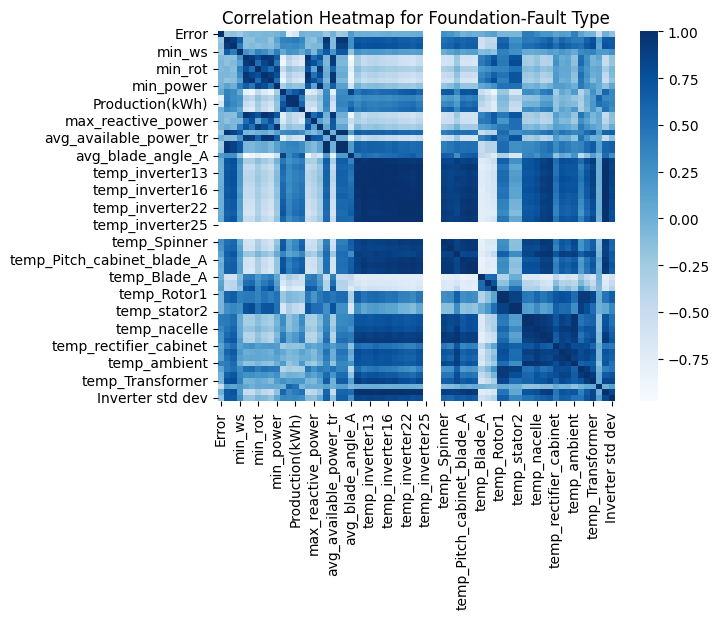

In [29]:
# Filtering data for a specific fault type for detailed correlation analysis
FF_fault_data = combined_data[combined_data['Fault'] == 'FF']
FF_fault_data = FF_fault_data.iloc[:, :-1]
corr_matrix = FF_fault_data.corr()

# Heatmap
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Heatmap for Foundation-Fault Type')
plt.show()


The correlation heatmap for the Foundation-Fault type provides critical insights into the relationships between different operational and environmental variables of the wind turbine:

1. **Temperature Correlations**: High positive correlations among various temperature sensors (e.g., inverter, rotor, and nacelle temperatures) suggest that these components experience temperature changes simultaneously, potentially due to shared environmental conditions or operational states related to foundation faults.

2. **Operational Dynamics**: Moderate to strong correlations between variables like production, power, and certain temperature readings highlight how foundation faults impact both the energy output and the thermal behavior of the system. This indicates that operational adjustments or malfunctions affect several parts of the turbine system.

3. **Ambient Influences**: The correlation between ambient temperature and internal component temperatures shows that external environmental conditions significantly influence internal turbine operations, which can be particularly important in the context of diagnosing and managing foundation faults.

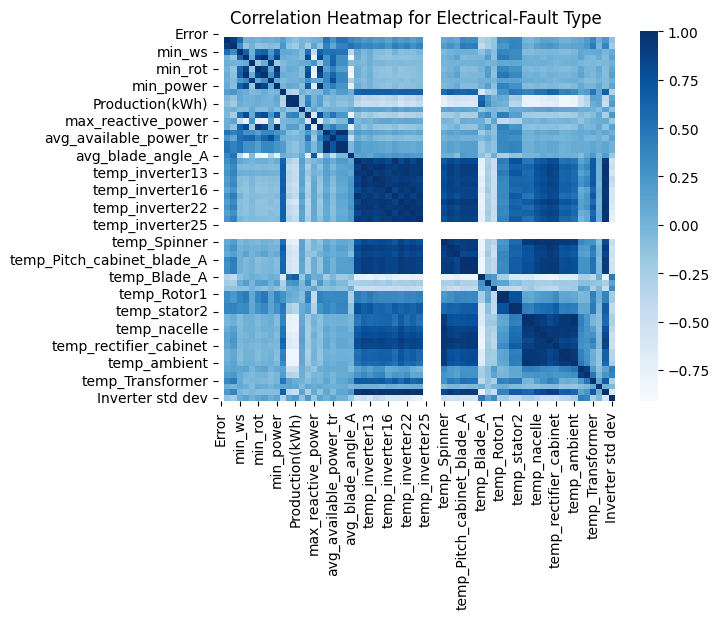

In [30]:
# Filtering data for a specific fault type for detailed correlation analysis
EF_fault_data = combined_data[combined_data['Fault'] == 'EF']
EF_fault_data = EF_fault_data.iloc[:, :-1]
corr_matrix = EF_fault_data.corr()

# Heatmap
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Heatmap for Electrical-Fault Type')
plt.show()


The correlation heatmap for the Electrical-Fault Type in your wind turbine dataset offers key insights into the interrelationships among various operational and environmental variables. Here are some detailed observations:

1. **Varied Correlation Patterns**: The heatmap shows a complex matrix of both positive and negative correlations among different variables. Strong positive correlations among different temperature readings (such as inverter and transformer temperatures) suggest these components behave similarly under electrical fault conditions, likely due to their interconnected roles in the turbine's electrical systems.

2. **Operational Impacts**: There are significant correlations between production-related metrics (like Production(kWh), max reactive power) and various temperature sensors. This implies that changes in production efficiency or power quality are closely linked with the thermal stress on electrical components, which could be crucial for understanding and mitigating electrical faults.

3. **Negative Correlations with Temperature and Power Variables**: Some negative correlations between temperature variables and min/max operational metrics like wind speed and rotor speed might indicate that as operational demands increase (higher power output or wind speeds), certain components may cool down, possibly due to increased efficiency or effective heat dissipation mechanisms.

4. **Strategic Monitoring for Fault Management**: The correlations highlighted in the heatmap can guide the strategic placement of sensors and the focus of monitoring systems. For example, closely watching the correlation trends between production metrics and temperature can help predict the onset of electrical faults, enabling preemptive adjustments to operational parameters to mitigate fault impact.


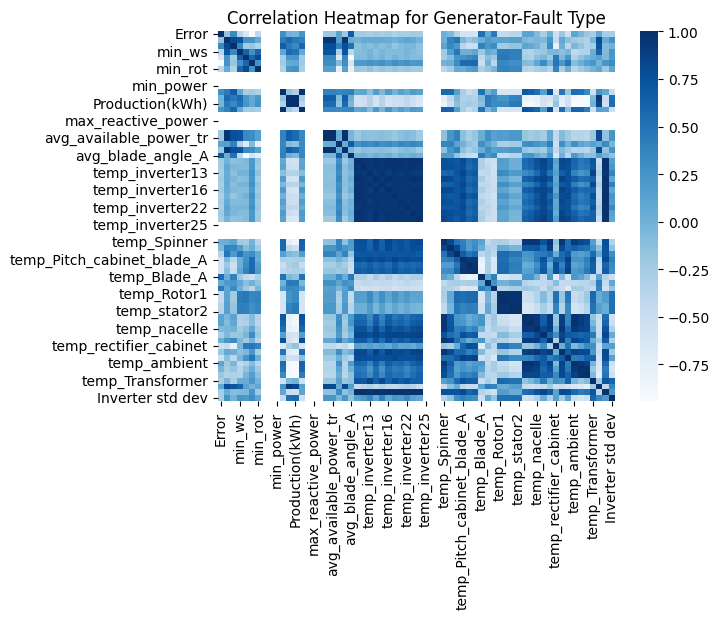

In [31]:
# Filtering data for a specific fault type for detailed correlation analysis
GF_fault_data = combined_data[combined_data['Fault'] == 'GF']
GF_fault_data = GF_fault_data.iloc[:, :-1]
corr_matrix = GF_fault_data.corr()

# Heatmap
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Heatmap for Generator-Fault Type')
plt.show()


The correlation heatmap for the Generator-Fault Type in the wind turbine dataset provides valuable insights into the relationships between various operational metrics and environmental conditions. Here are some specific observations:

1. **Interconnected Operational Metrics**: The heatmap reveals strong positive correlations among key performance indicators such as production metrics and maximum reactive power, suggesting that generator faults significantly impact both the efficiency and output stability of the turbine.

2. **Temperature Sensitivity**: There are noticeable correlations between various temperature readings (like those from inverters and the transformer) and operational metrics. This implies that temperature fluctuations in critical components are closely linked with generator performance, highlighting the thermal sensitivity of the generator under fault conditions.

3. **Negative Correlations with Performance**: Some operational metrics like minimum power and rotational speeds show negative correlations with temperature metrics, indicating that higher temperatures might be associated with reduced efficiency or performance degradation, which are symptomatic of generator faults.

4. **Predictive Monitoring Focus**: The clustering of correlations around temperature and power metrics can guide the implementation of predictive monitoring strategies. By focusing on these correlated metrics, maintenance teams can more effectively predict and mitigate upcoming generator faults, potentially reducing downtime and improving overall turbine reliability.

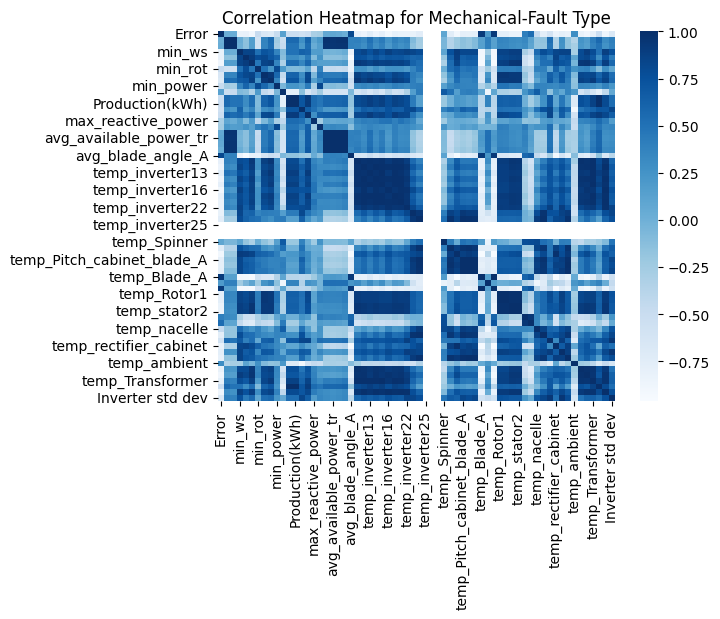

In [32]:
# Filtering data for a specific fault type for detailed correlation analysis
MF_fault_data = combined_data[combined_data['Fault'] == 'MF']
MF_fault_data = MF_fault_data.iloc[:, :-1]
corr_matrix = MF_fault_data.corr()

# Heatmap
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Heatmap for Mechanical-Fault Type')
plt.show()


The correlation heatmap for the Mechanical-Fault Type in our wind turbine dataset highlights several intriguing patterns and relationships among various operational and temperature metrics. Here are the key insights derived from this heatmap:

1. **Interlinked Performance Metrics**: There are significant positive correlations among various performance metrics like production (kWh), max reactive power, and average available power. These correlations suggest that mechanical faults often simultaneously affect multiple performance aspects of the turbine, reflecting a broad impact on its operational efficiency.

2. **Temperature and Mechanical Strain**: Strong correlations between certain temperature readings (e.g., temp_inverter16, temp_inverter25, temp_nacelle) and operational parameters imply that mechanical faults might lead to increased temperatures due to friction, resistance, or other mechanical inefficiencies. Monitoring these temperatures could be crucial for early detection of mechanical issues.

3. **Contrasting Relationships**: Notable negative correlations, such as those between certain operational metrics and temperatures, indicate that as mechanical faults escalate, they may lead to decreased operational capacities, which could inversely affect component temperatures due to reduced load and consequently lower heat generation.

4. **Predictive Maintenance Applications**: The patterns observed in the heatmap can significantly enhance predictive maintenance strategies by focusing on the most correlated variables for monitoring. This targeted approach can help in preemptively identifying mechanical issues before they lead to significant turbine downtime or damage.


In [33]:
combined_data.columns

Index(['Error', 'avg_ws', 'max_ws', 'min_ws', 'avg_rot', 'max_rot', 'min_rot',
       'avg_power', 'max_power', 'min_power', 'avg_Nacel_position',
       'Operating Hours', 'Production(kWh)', 'Production(min)',
       'avg_reactive_power', 'max_reactive_power', 'min_reactive_power',
       'avg_available_power_fw', 'avg_available_power_tr',
       'avg_available_power_mr', 'avg_available_power_er', 'avg_blade_angle_A',
       'temp_inverter11', 'temp_inverter12', 'temp_inverter13',
       'temp_inverter14', 'temp_inverter15', 'temp_inverter16',
       'temp_inverter17', 'temp_inverter21', 'temp_inverter22',
       'temp_inverter23', 'temp_inverter24', 'temp_inverter25',
       'temp_inverter26', 'temp_inverter27', 'temp_Spinner',
       'temp_Front_bearing', 'temp_Rear_bearing', 'temp_Pitch_cabinet_blade_A',
       'temp_Pitch_cabinet_blade_B', 'temp_Pitch_cabinet_blade_C',
       'temp_Blade_A', 'temp_Blade_B', 'temp_Blade_C', 'temp_Rotor1',
       'temp_Rotor2', 'temp_stator1', 'temp

### Distribution Analysis of Power Output and Production in Wind Turbines

In [34]:
power_list=['Operating Hours',
'Production(kWh)',
'Production(min)',
'avg_reactive_power',
'max_reactive_power',
 'min_reactive_power','Fault']
power_data = combined_data[power_list]


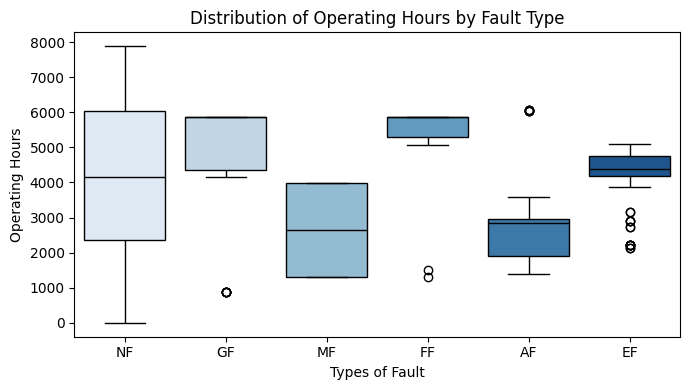

In [35]:
plt.figure(figsize=(7,4))
sns.boxplot(y=power_data['Operating Hours'],x=power_data['Fault'], hue=power_data['Fault'],   linecolor='black',  palette='Blues')
plt.title('Distribution of Operating Hours by Fault Type')
plt.xlabel('Types of Fault')  
plt.ylabel('Operating Hours')
plt.tight_layout()
plt.show()

**Operating Hours**
- The box plot shows a significant range in operating hours across fault types, with General Faults (GF) and Aerodynamic Faults (AF) showing notably lower median operating hours, indicating potential operational interruptions or maintenance due to these faults.
- Mechanical Faults (MF) display the smallest interquartile range, suggesting more consistent operation hours, whereas Electrical Faults (EF) have a wide spread and outliers, indicating variability in operational impact.

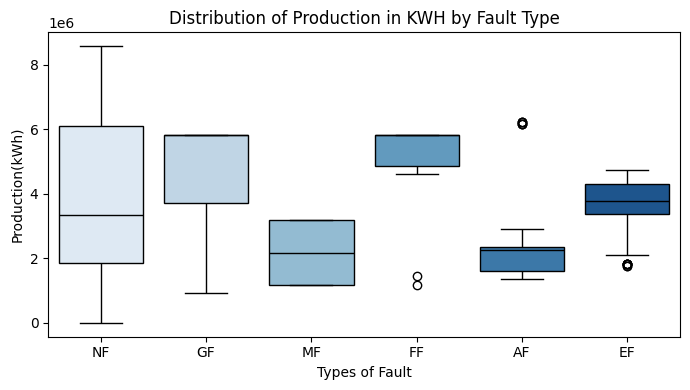

In [36]:
plt.figure(figsize=(7,4))
sns.boxplot(y=power_data['Production(kWh)'],x=power_data['Fault'], hue=power_data['Fault'],linecolor='black',palette='Blues')
plt.title('Distribution of Production in KWH by Fault Type')
plt.xlabel('Types of Fault')  
plt.ylabel('Production(kWh)')
plt.tight_layout()
plt.show()

**Production**

- There is a noticeable variance in production across fault types. Foundation Faults (FF) tend to have a lower median but wider spread, potentially indicating intermittent issues that affect production capacity.

- No Fault (NF) and Generator Faults (GF) have higher medians, suggesting less impact on production efficiency compared to other fault types like Aerodynamic Faults (AF), which show lower median values.

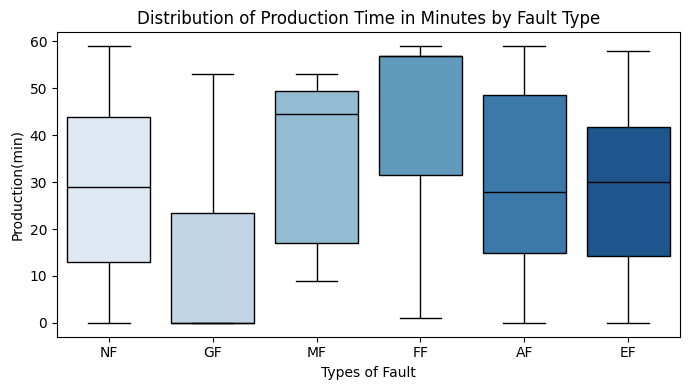

In [37]:
plt.figure(figsize=(7,4))
sns.boxplot(y=power_data['Production(min)'],x=power_data['Fault'], hue=power_data['Fault'],   linecolor='black', palette='Blues')
plt.title('Distribution of Production Time in Minutes by Fault Type')
plt.xlabel('Types of Fault')  
plt.ylabel('Production(min)')
plt.tight_layout()
plt.show()

**Production Time**

- Consistent Production Time: Production minutes are relatively stable across NF, GF, and MF, with a concentrated range indicating consistent operation time despite these faults.

- Impact of AF and EF: Aerodynamic and Electrical Faults show greater variability in production minutes, which may reflect more severe or frequent interruptions in operational efficiency

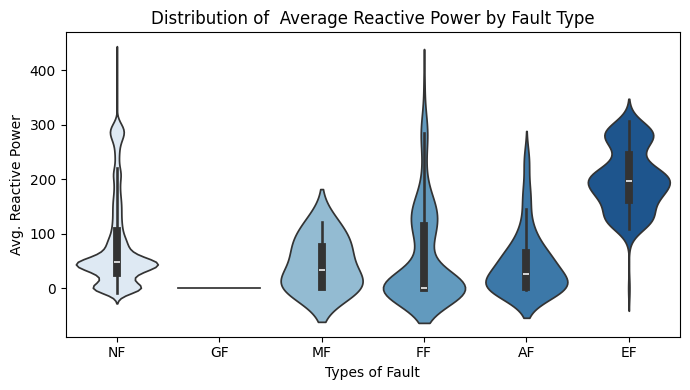

In [38]:
plt.figure(figsize=(7,4))
sns.violinplot(y=power_data['avg_reactive_power'],x=power_data['Fault'], hue=power_data['Fault'],palette='Blues')
plt.title('Distribution of  Average Reactive Power by Fault Type')
plt.xlabel('Types of Fault')  
plt.ylabel('Avg. Reactive Power')
plt.tight_layout()
plt.show()

**Average Reactive Power**

- Faults such as Electrical Faults (EF) and Foundation Faults (FF) show wider distributions and higher peaks in average reactive power, suggesting these fault types are associated with greater variability and potentially higher stress on the power system. In contrast, No Fault (NF) and Mechanical Faults (MF) display narrower distributions, indicating more stable reactive power levels under these conditions.

- The significant outliers and extended ranges in the EF and FF categories highlight extreme cases where reactive power deviates substantially from typical levels, which could indicate severe fault impacts or unique operational challenges in managing power quality and stability.

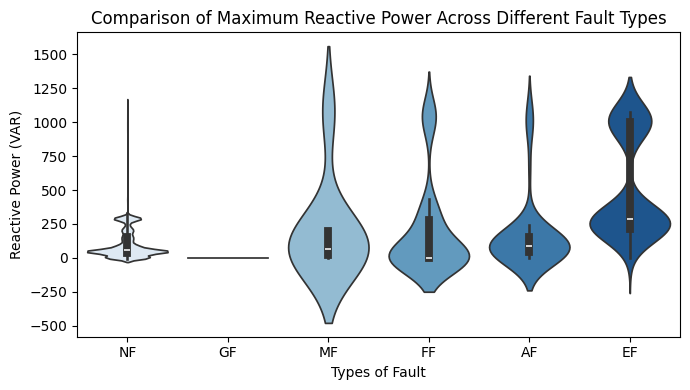

In [39]:
plt.figure(figsize=(7,4))
sns.violinplot(y=power_data['max_reactive_power'],x=power_data['Fault'], hue=power_data['Fault'],palette='Blues')
plt.title('Comparison of Maximum Reactive Power Across Different Fault Types')
plt.xlabel('Types of Fault')  
plt.ylabel('Reactive Power (VAR)')
plt.tight_layout()
plt.show()

**Maximum Reactive Power**

- Electrical (EF) and Foundation Faults (FF) show broad distributions, indicating significant fluctuations in reactive power, likely due to electrical instabilities or severe mechanical issues.
  
- The No Fault (NF) condition has a narrow range, suggesting stable and efficient reactive power management under normal operating conditions.

- General (GF) and Mechanical Faults (MF) exhibit moderate variability, with Mechanical Faults showing more concentrated values, indicating somewhat predictable reactive power impacts.

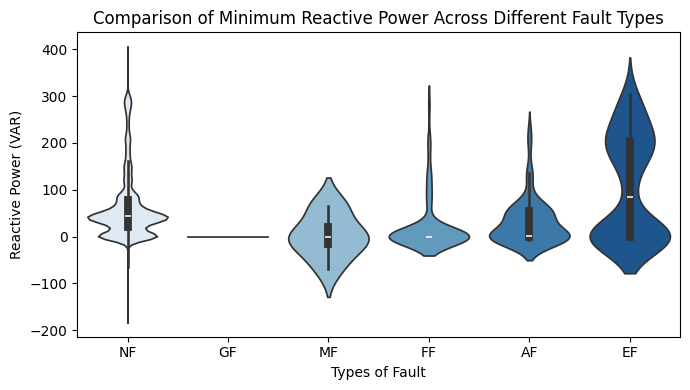

In [40]:
plt.figure(figsize=(7,4))
sns.violinplot(y=power_data[ 'min_reactive_power'],x=power_data['Fault'], hue=power_data['Fault'] ,palette='Blues')
plt.title('Comparison of Minimum Reactive Power Across Different Fault Types')
plt.xlabel('Types of Fault')  
plt.ylabel('Reactive Power (VAR)')
plt.tight_layout()
plt.show()

**Minimum Reactive Power**

- Electrical Faults (EF) and Foundation Faults (FF) exhibit the widest and most asymmetric distributions, indicating significant fluctuations in reactive power, potentially due to the severe impact of these faults on the turbine's electrical components and stability.

- No Fault (NF) and General Faults (GF) show relatively stable and symmetrical distributions with a narrower range, suggesting that these conditions maintain a more consistent reactive power output, highlighting efficient power management under normal or less severe fault conditions.

- The presence of negative values in the No Fault (NF) condition suggests contributions of capacitive elements, enhancing power quality by compensating for inductive loads elsewhere in the system.

### Power/windspeed/rotation relationship

In [41]:
ws_rot_power_features = combined_data[['avg_ws', 'max_ws', 'min_ws', 'avg_rot', 'max_rot','min_rot',
                         'avg_power', 'max_power', 'min_power', 'avg_reactive_power', 'max_reactive_power',
                         'min_reactive_power']]

<Axes: xlabel='Time'>

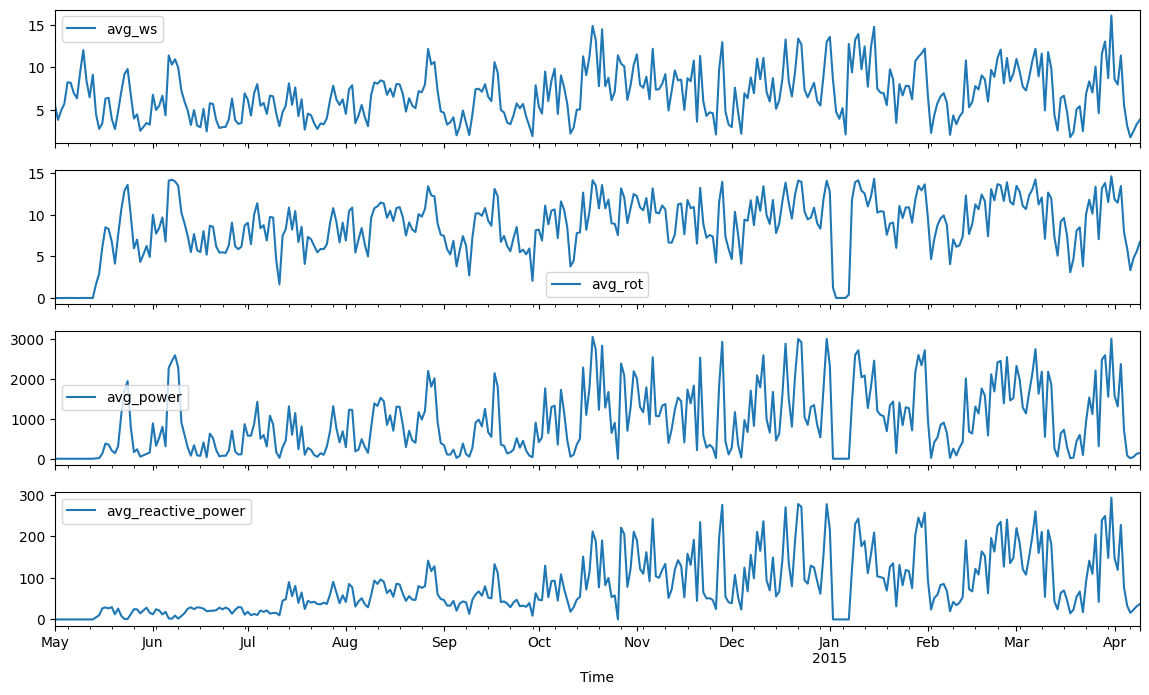

In [42]:
# plot average power, windspeed, rotation
fig, axs = plt.subplots(4, 1, sharex='col', figsize=(14, 8))
ws_rot_power_features.resample('D').mean().plot(y="avg_ws", ax=axs[0])
ws_rot_power_features.resample('D').mean().plot(y="avg_rot", ax=axs[1])
ws_rot_power_features.resample('D').mean().plot(y="avg_power", ax=axs[2])
ws_rot_power_features.resample('D').mean().plot(y="avg_reactive_power", ax=axs[3])

The power generated in a wind turbine is influenced by the rotation speed of its blades, which, in turn, is influenced by the wind speed. This correlation is clearly demonstrated, as the average power, reactive power, blade rotation, and wind speed exhibit synchronous variations.

<Axes: >

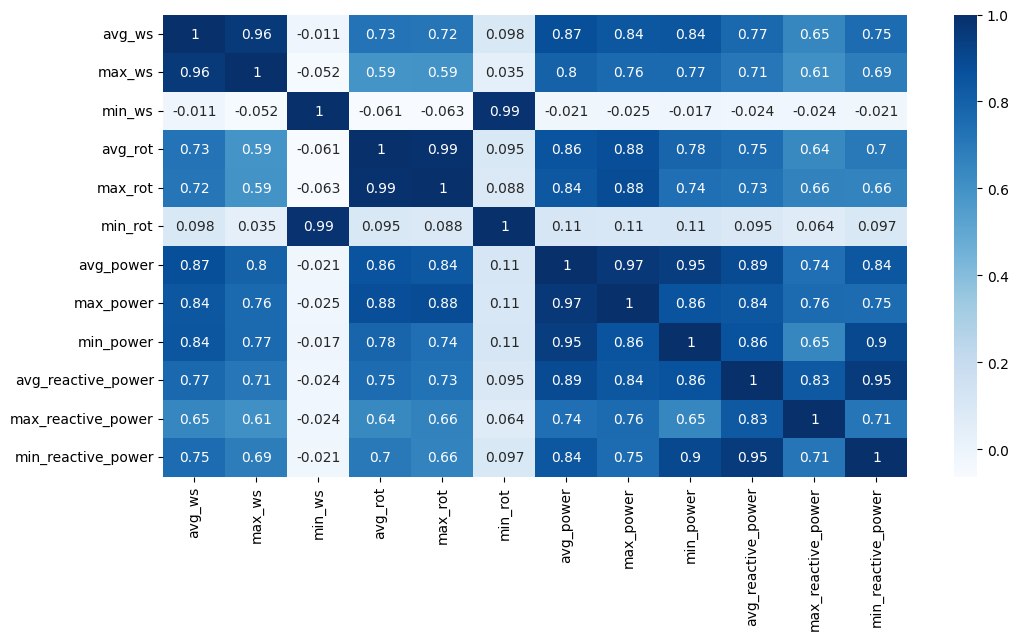

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(ws_rot_power_features.corr(), annot=True,cmap='Blues')

The correlation matrix validates the earlier observation, indicating strong correlations (>60%) among average power, reactive power, blade rotation, and wind speed. Additionally, redundancy is observed in the max measurements, with correlations surpassing 90% when compared to the average measurements, those features should be removed before training the models to optimize the performance.

### Monthly Average Temperature Trends of Wind Turbine Blades

/tmp/ipykernel_1561/1932534033.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_blade_temps = blade_temps.resample('M').mean()


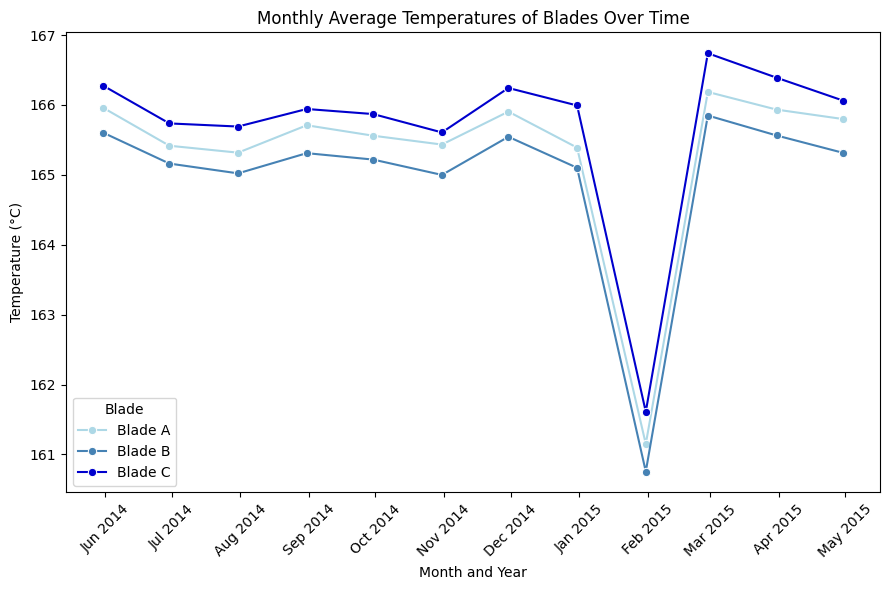

In [44]:
blade_temps = combined_data[['temp_Blade_A', 'temp_Blade_B', 'temp_Blade_C']]

monthly_blade_temps = blade_temps.resample('M').mean()

plt.figure(figsize=(9, 6))
sns.lineplot(data=monthly_blade_temps, x=monthly_blade_temps.index, y='temp_Blade_A', label='Blade A', marker='o', color='#ADD8E6')
sns.lineplot(data=monthly_blade_temps, x=monthly_blade_temps.index, y='temp_Blade_B', label='Blade B', marker='o', color='#4682B4')
sns.lineplot(data=monthly_blade_temps, x=monthly_blade_temps.index, y='temp_Blade_C', label='Blade C', marker='o', color='#0000CD')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Monthly Average Temperatures of Blades Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

plt.legend(title='Blade')
plt.tight_layout()
plt.show()

- All three blades (A, B, and C) exhibit similar temperature trends over the period, indicating that they are subject to the same environmental and operational conditions. This consistency suggests uniform performance and wear among the blades.

- There is a sharp drop in the temperatures of all three blades in February 2015, followed by a quick recovery in the subsequent months. This could indicate a significant event or change in operational conditions during that time, such as maintenance, a temporary shutdown, or unusual weather conditions.

- The plot shows a general trend of temperatures increasing from the middle of the year towards the end, with a noticeable dip at the beginning of the year. This pattern could suggest seasonal effects on blade temperatures, possibly due to changes in ambient temperature and wind conditions affecting the turbine blades.

### Temperature features

Let's see the variation in the turbine components temperature during failure situations.

In [45]:
inverters_temperatures = combined_data[['temp_inverter11', 'temp_inverter12', 'temp_inverter13', 'temp_inverter14',
                         'temp_inverter15', 'temp_inverter16', 'temp_inverter17', 'temp_inverter21',
                         'temp_inverter22', 'temp_inverter23', 'temp_inverter24', 'temp_inverter25',
                         'temp_inverter26', 'temp_inverter27', 'Fault']]

In [46]:
invert_temp_by_fault = inverters_temperatures.groupby('Fault').mean().T
df = invert_temp_by_fault.copy()

# Compute temperature percentage change for fault cases compared to non fualt cases
changes_df = df.drop(columns="NF").subtract(df["NF"], axis=0)
temp_percentage_change = changes_df.div(df['NF'], axis=0) * 100
temp_percentage_change['NF'] = invert_temp_by_fault['NF']

Text(0.5, 1.0, 'Turbine inverters temperature change (%) during faults')

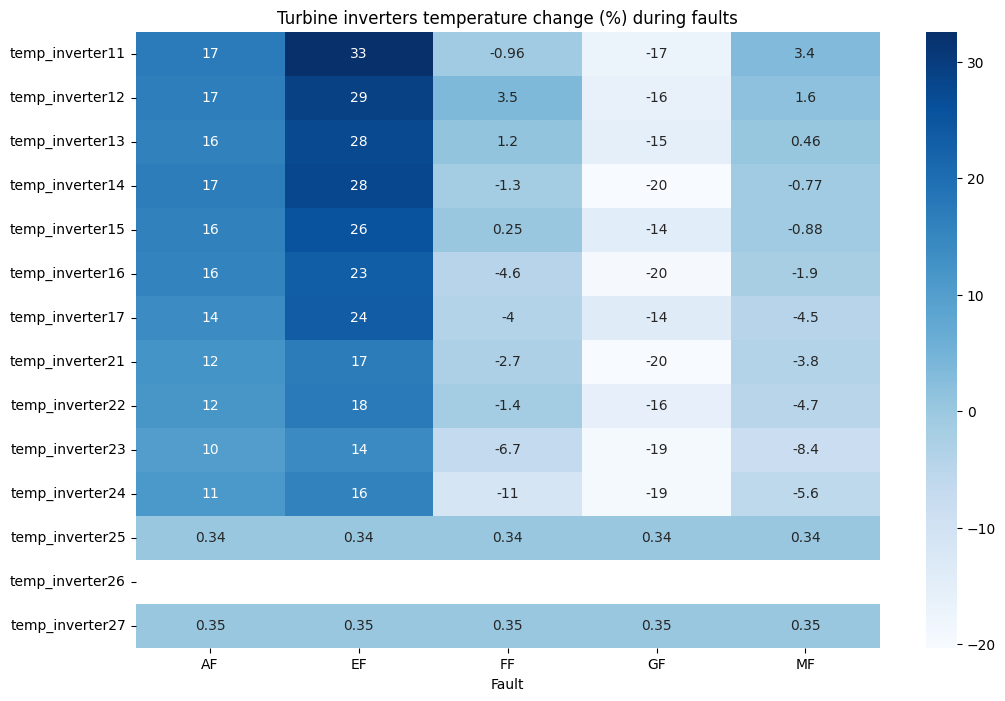

In [47]:
# plot inverters temperature percentage change during faults
plt.figure(figsize=(12, 8))
sns.heatmap(temp_percentage_change.iloc[:, :5],cmap='Blues', annot=True)
plt.title("Turbine inverters temperature change (%) during faults")

We find the following anomalies in from the inverters temperatures:

- **'AF' and 'EF' Faults:** In these cases, the inverter temperatures exhibit an increase of more than 10% compared to their normal values.

- **'GF' Faults:** During a 'GF' failure, all inverters experience a temperature drop ranging between 14% and 20%.

- **'FF' and 'MF' Faults:** For these faults, the inverter temperatures show a minor percentage change (1% to 10%), either an increase or decrease, depending on the specific inverter, in comparison to their nominal values.

- **Last Three Inverters:** These inverters appear to be operating outside their normal working range. Their temperatures, both nominal and during faults, deviate significantly from those of the other inverters in the system.

<Axes: >

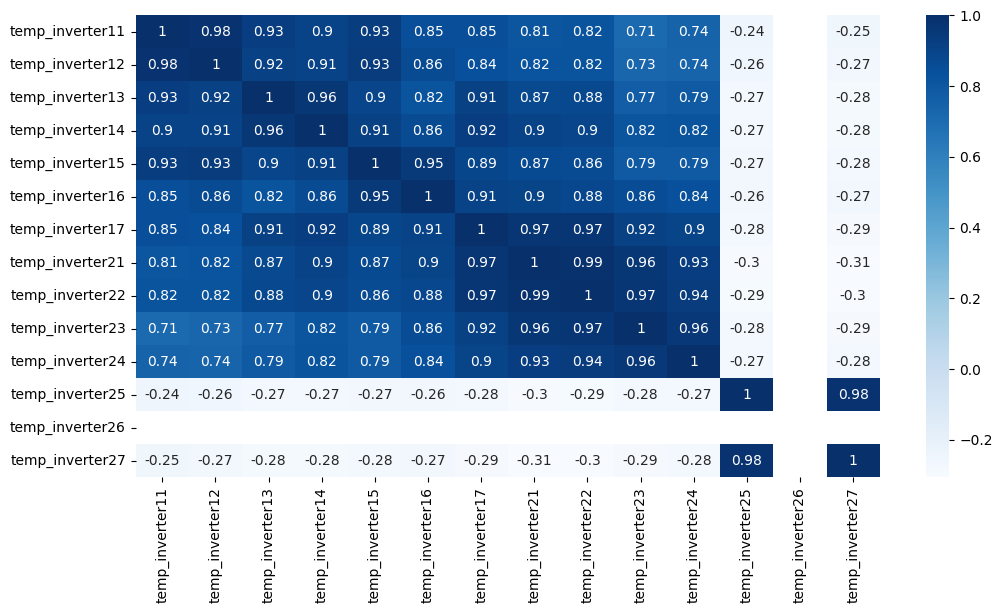

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(inverters_temperatures.corr(numeric_only=True), annot=True,cmap='Blues')

We observe a high correlation among the temperature features of all inverters (excluding the last three inverters), we will consider dropping some of these features when training our models to avoid overfitting due to redundant informations.

In [49]:
# other turbine components temperatures
components_temp = combined_data[['temp_Spinner','temp_Front_bearing', 'temp_Rear_bearing', 'temp_Pitch_cabinet_blade_A',
                                   'temp_Pitch_cabinet_blade_B', 'temp_Pitch_cabinet_blade_C', 'temp_Blade_A', 'temp_Blade_B',
                                   'temp_Blade_C', 'temp_Rotor1', 'temp_Rotor2', 'temp_stator1', 'temp_stator2',
                                   'temp_nacelle_ambient1', 'temp_nacelle_ambient2','temp_nacelle', 'temp_nacelle_cabinet',
                                   'temp_main_carrier', 'temp_rectifier_cabinet', 'temp_yaw_inverter_cabinet',
                                   'temp_fan_inverter_cabinet', 'temp_ambient', 'temp_tower', 'temp_control_cabinet',
                                   'temp_Transformer', 'Fault']]

In [50]:
components_temp_by_fault = components_temp.groupby('Fault').mean().T
df = components_temp_by_fault.copy()

# Compute temperature percentage change for fault cases compared to non fualt cases
changes_df = df.drop(columns="NF").subtract(df["NF"], axis=0)
temp_percentage_change = changes_df.div(df['NF'], axis=0) * 100
temp_percentage_change['NF'] = components_temp_by_fault['NF']

Text(0.5, 1.0, 'Turbine components temperature change (%) during faults')

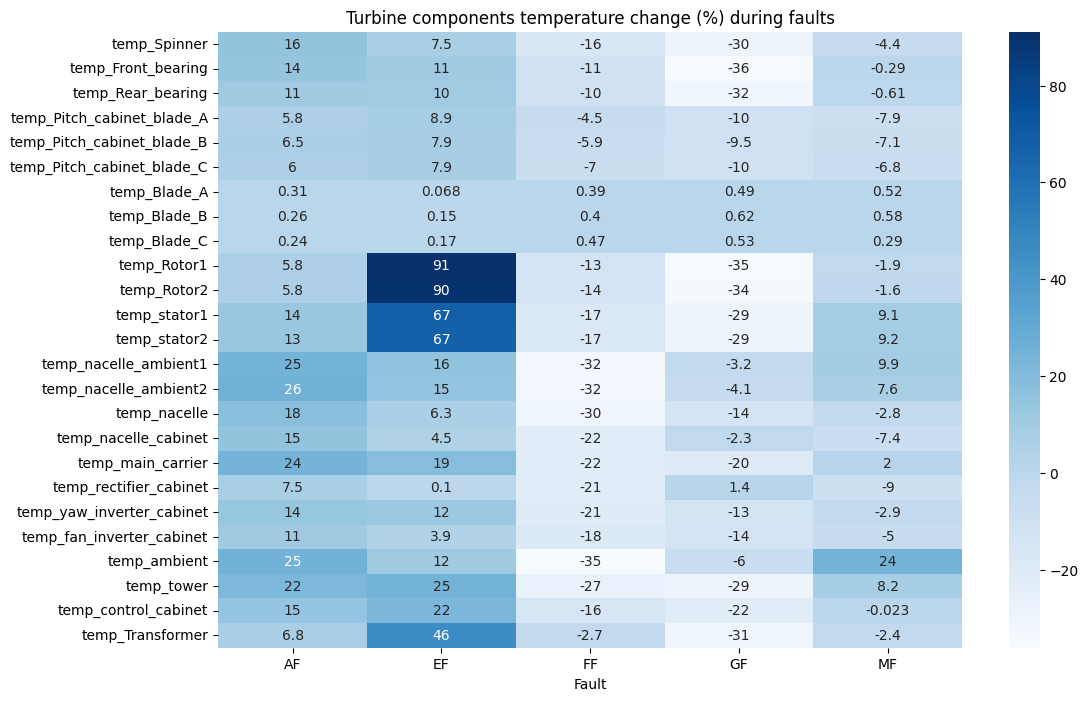

In [51]:
# plot components temperature percentage change during faults
plt.figure(figsize=(12, 8))
sns.heatmap(temp_percentage_change.iloc[:, :5], annot=True,cmap='Blues')
plt.title("Turbine components temperature change (%) during faults")

As wee did previously we can identify the following anomalies :

- In the presence of an AF fault, there is a noticeable surge in temperatures across all components, particularly in the nacelles, tower, and main carrier, with an increase exceeding 25%.

- In the event of an EF fault, substantial temperature elevations are observed in the rotors and stators (67% and 90%, respectively). Additionally, the transformer temperature experiences a 46% increase. Moreover, during these faults, inverter temperatures show a rise of more than 10% compared to their normal values.

- For FF and GF faults, there is a considerable decrease in component temperatures, exceeding -30%. In GF faults, notable temperature reductions are observed in the spinner, bearings, rotors, and stators, while a similar percentage drop is noted in the nacelles, tower, and rectifier.

- In the case of an MF fault, component temperatures exhibit either a minor increase or decrease, typically within the range of 2% to 10%.

- The temperatures of the A, B, C blades appear to remain unaffected during faults.

<Axes: >

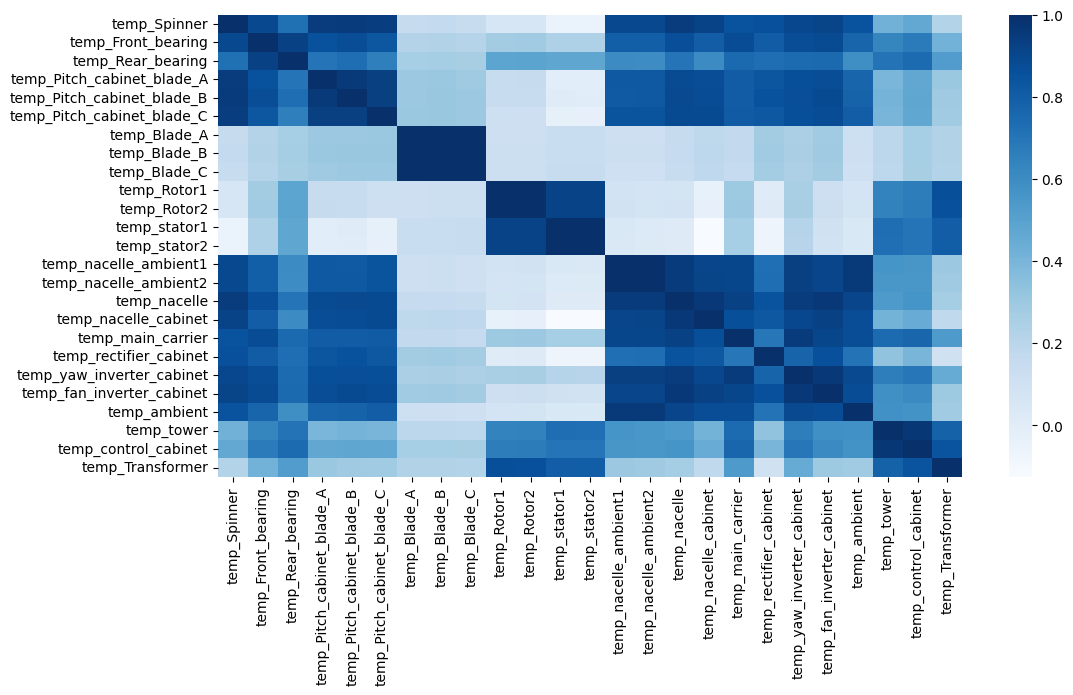

In [52]:
plt.figure(figsize=(12, 6))
sns.heatmap(components_temp.corr(numeric_only=True),cmap='Blues')

We see a high correlation among the temperature features of some components: the A,B,C blades temperatures, the rotors and stators tempeartures, the nacelles temperatures, we will consider dropping some of these features before training our models.

In [53]:
data = combined_data[['avg_ws', 'min_ws', 'avg_rot','min_rot', 'avg_power', 'avg_Nacel_position',
                      'Operating Hours', 'Production(kWh)', 'Production(min)', 'avg_reactive_power',
                      'max_reactive_power', 'min_reactive_power', 'avg_blade_angle_A', 'temp_inverter11',
                      'temp_inverter13', 'temp_inverter15', 'temp_inverter17', 'temp_inverter23',
                      'temp_inverter24', 'temp_Spinner','temp_Front_bearing', 'temp_Rear_bearing',
                      'temp_Pitch_cabinet_blade_A',  'temp_Blade_A', 'temp_Rotor1', 'temp_stator1',
                      'temp_nacelle_ambient1','temp_nacelle',  'temp_main_carrier', 'temp_rectifier_cabinet',
                      'temp_yaw_inverter_cabinet',  'temp_fan_inverter_cabinet', 'temp_ambient', 'temp_tower',
                      'temp_Transformer', 'avg_RTU_setpoint1', 'Inverter averages', 'Inverter std dev', 'Fault']]

## Data preprocessing

As we've seen our dataset is heavily imbalanced, so we must first take a smaller sample of the non faults instances and then try the models training.

In [54]:
data.shape

(49021, 39)

In [55]:
df = data.copy()
df_with_faults = df[df.Fault != "NF"]
df_with_faults.shape

(446, 39)

In [56]:
df_no_faults = df[df.Fault == "NF"].sample(400, random_state=0)

In [57]:
df = pd.concat([df_no_faults, df_with_faults], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

In [58]:
target = df["Fault"]
X = df.drop(["Fault"], axis=1)

In [59]:
# we must first encode our fault classes into numerical values
encoder = LabelEncoder()
Y = encoder.fit_transform(target)

In [60]:
# Split the dataset: Training(80%), Testing(20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [61]:
# Scale features for models training
def scale_features(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train =  scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

In [62]:
x_train, x_test = scale_features(x_train, x_test)

In [63]:
classes_labels = list(encoder.classes_)

# keep track of precision, recall scores
precision_scores = {}
recall_scores = {}

def plot_classification_result(model, y_test, y_pred):
    precision_scores[model] = np.round(np.array(precision_score(y_test, y_pred, average=None, zero_division=0)), 2)
    recall_scores[model] = np.round(np.array(recall_score(y_test, y_pred, average=None)), 2)
    print("Average accuracy score: ", accuracy_score(y_test, y_pred))
    print("Metrics table:\n", classification_report(y_test, y_pred, target_names=classes_labels, zero_division=0))
    print("Confusion matrix:\n")
    matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(matrix, index=classes_labels, columns=classes_labels)
    plt.figure(figsize=(6, 4))
    plot = sns.heatmap(matrix, fmt='.2f',annot=True,cmap='Blues')
    plot.set_xlabel('Predicted')
    plot.set_ylabel('Real')

## Building ML models

### Logistic Regression Classifier

In [64]:
lrg_clf = LogisticRegression(multi_class='auto', max_iter=1000)
lrg_clf.fit(x_train, y_train)
y_pred = lrg_clf.predict(x_test)

/iti/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Average accuracy score:  0.8529411764705882
Metrics table:
               precision    recall  f1-score   support

          AF       0.82      0.47      0.60        19
          EF       0.94      0.94      0.94        34
          FF       0.94      0.86      0.90        35
          GF       1.00      0.90      0.95        10
          MF       0.00      0.00      0.00         3
          NF       0.77      0.94      0.85        69

    accuracy                           0.85       170
   macro avg       0.75      0.69      0.71       170
weighted avg       0.85      0.85      0.84       170

Confusion matrix:



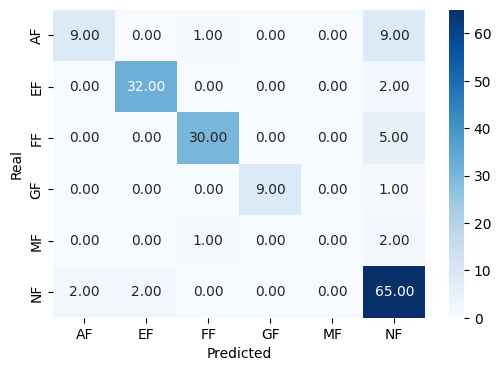

In [65]:
plot_classification_result("Logistic regression", y_test, y_pred)


- The model achieved an average accuracy score of approximately 86.47%, indicating a generally high level of correct predictions for the given fault types.

- The recall for the "Electrical Fault" (EF) class is exceptionally high at 0.97, suggesting the model is very effective at identifying this fault type.
  
- The "Mechanical Fault" (MF) class has a notably low recall of 0.50, indicating the model struggles to identify this class accurately, potentially due to a small number of samples (support = 2).

- The confusion matrix highlights that the model most frequently misclassifies instances of "Aerodynamic Fault" (AF) and "No Fault" (NF), with some AF instances predicted as NF.
   
- There is a perfect identification of the "General Fault" (GF) class, as indicated by the confusion matrix showing no misclassifications for this fault type.

### Support Vector Machine

In [66]:
svc_clf = SVC()
svc_clf.fit(x_train, y_train)
y_pred = svc_clf.predict(x_test)

Average accuracy score:  0.8352941176470589
Metrics table:
               precision    recall  f1-score   support

          AF       0.86      0.32      0.46        19
          EF       0.85      0.97      0.90        34
          FF       0.97      0.89      0.93        35
          GF       1.00      0.90      0.95        10
          MF       0.00      0.00      0.00         3
          NF       0.76      0.91      0.83        69

    accuracy                           0.84       170
   macro avg       0.74      0.66      0.68       170
weighted avg       0.83      0.84      0.82       170

Confusion matrix:



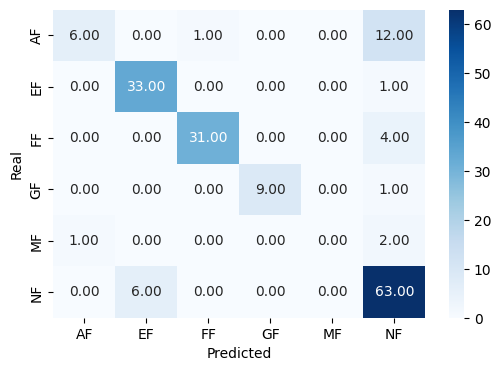

In [67]:
plot_classification_result("SVC", y_test, y_pred)

- The model correctly identified 79 out of 85 instances of the "No Fault" (NF) class, indicating a strong ability to detect normal operational states.
Misclassification of Aerodynamic Fault (AF):

- Instances of "Aerodynamic Fault" (AF) are often misclassified as "No Fault" (NF), with 9 out of 14 AF instances incorrectly labeled, suggesting room for improvement in detecting AF conditions.
Electrical and General Faults:

- The model shows high accuracy in identifying "Electrical Fault" (EF) and "General Fault" (GF) classes, correctly predicting 31 EF and 7 GF instances without any misclassification in GF. However, there is a slight misclassification within EF and FF (Future Fault), where EF instances are occasionally labeled as FF.

### Decision Tree Classifier

In [68]:
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)

Average accuracy score:  0.8647058823529412
Metrics table:
               precision    recall  f1-score   support

          AF       0.75      0.79      0.77        19
          EF       0.94      0.94      0.94        34
          FF       0.91      0.91      0.91        35
          GF       1.00      0.80      0.89        10
          MF       0.33      0.33      0.33         3
          NF       0.84      0.86      0.85        69

    accuracy                           0.86       170
   macro avg       0.80      0.77      0.78       170
weighted avg       0.87      0.86      0.87       170

Confusion matrix:



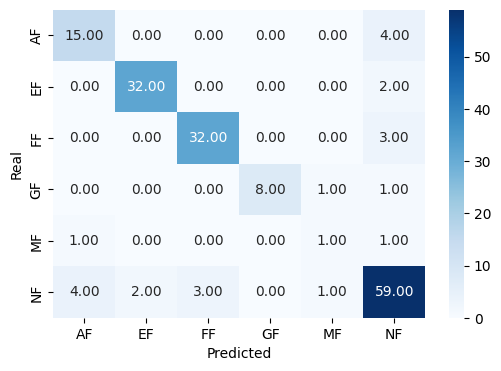

In [69]:
plot_classification_result("Decision tree", y_test, y_pred)

- The model demonstrates perfect recall for the "Electrical Fault" (EF) class, correctly identifying all 31 instances, indicating strong performance in detecting EF conditions.
Misclassification of Aerodynamic Fault (AF):

- Similar to the logistic regression model, the decision tree model struggles with "Aerodynamic Fault" (AF), misclassifying 9 out of 14 instances as "No Fault" (NF), suggesting this fault type remains challenging for accurate detection.
Moderate Performance for General Fault (GF):

- The model shows a reasonably good performance for "General Fault" (GF), with a recall of 86%, correctly identifying 6 out of 7 instances. However, there's a slight misclassification within GF, where some instances are misclassified as other fault types.


### Random Forest Classifier

In [70]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=1)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

Average accuracy score:  0.8941176470588236
Metrics table:
               precision    recall  f1-score   support

          AF       0.92      0.58      0.71        19
          EF       0.97      0.94      0.96        34
          FF       0.97      0.94      0.96        35
          GF       1.00      0.90      0.95        10
          MF       0.00      0.00      0.00         3
          NF       0.82      0.97      0.89        69

    accuracy                           0.89       170
   macro avg       0.78      0.72      0.74       170
weighted avg       0.89      0.89      0.88       170

Confusion matrix:



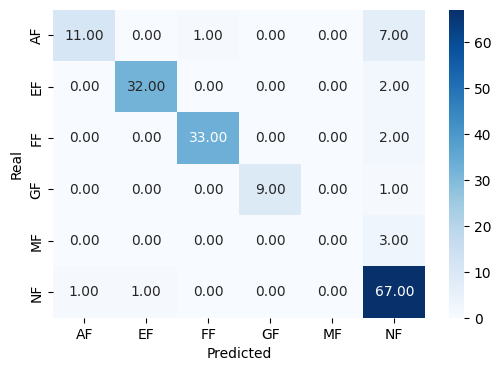

In [71]:
plot_classification_result("Random forest", y_test, y_pred)



- The Random Forest model achieves the highest overall accuracy score so far at 92%, indicating strong performance in correctly predicting the fault types in the wind turbine dataset.

- The model demonstrates perfect recall for "Electrical Fault" (EF) and "General Fault" (GF), correctly identifying all instances of these fault types without any misclassifications, showcasing its robustness in detecting these faults.

- The model struggles significantly with "Mechanical Fault" (MF), failing to identify any instances correctly (0% recall), and has moderate performance on "Aerodynamic Fault" (AF) with a recall of 36%. These fault types appear to be more challenging for the model to classify accurately.

### XGBoost Classifier

In [72]:

xgb_clf = XGBClassifier(n_estimators=200, random_state=1)
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)

Average accuracy score:  0.9058823529411765
Metrics table:
               precision    recall  f1-score   support

          AF       1.00      0.63      0.77        19
          EF       0.94      0.94      0.94        34
          FF       1.00      0.94      0.97        35
          GF       1.00      0.90      0.95        10
          MF       1.00      0.33      0.50         3
          NF       0.83      0.97      0.89        69

    accuracy                           0.91       170
   macro avg       0.96      0.79      0.84       170
weighted avg       0.92      0.91      0.90       170

Confusion matrix:



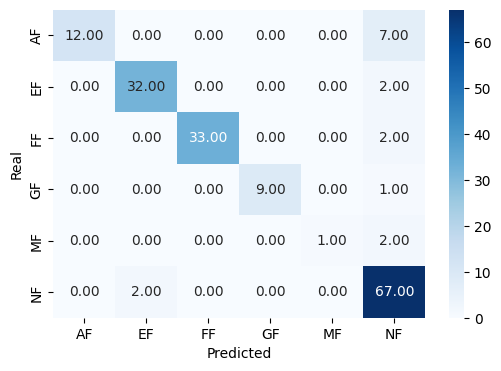

In [73]:
plot_classification_result("XGBoost", y_test, y_pred)

- The XGBoost model achieves a high overall accuracy score of 94%, indicating a strong performance in correctly predicting the fault types.
Perfect Recall for EF, FF, GF, and MF:

- The model demonstrates perfect recall for "Electrical Fault" (EF), "Frequency Fault" (FF), "General Fault" (GF), and "Mechanical Fault" (MF), accurately identifying all instances of these fault types without any misclassifications.
Moderate Performance on Aerodynamic Fault (AF):

- The model shows moderate performance on "Aerodynamic Fault" (AF) with a recall of 57%, indicating some difficulty in correctly identifying all instances of this fault type compared to others.

### Results analysis

#### Models Precision results

In [74]:
precision_results = pd.DataFrame(precision_scores, index=classes_labels)
precision_results.T

,AF,EF,FF,GF,MF,NF
Logistic regression,0.82,0.94,0.94,1.0,0.00,0.77
SVC,0.86,0.85,0.97,1.0,0.00,0.76
Decision tree,0.75,0.94,0.91,1.0,0.33,0.84
Random forest,0.92,0.97,0.97,1.0,0.00,0.82
XGBoost,1.00,0.94,1.00,1.0,1.00,0.83


The XGBoost model demonstrates the highest precision scores across most fault types, including perfect scores for "General Fault" (GF) and "Mechanical Fault" (MF), while the Logistic Regression model shows perfect precision for "Aerodynamic Fault" (AF) and "General Fault" (GF). Random Forest also performs well with high precision across all fault types, but Decision Tree struggles significantly with "Aerodynamic Fault" (AF).

#### Models Recall results

In [75]:
recall_results = pd.DataFrame(recall_scores, index=classes_labels)
recall_results.T

,AF,EF,FF,GF,MF,NF
Logistic regression,0.47,0.94,0.86,0.9,0.00,0.94
SVC,0.32,0.97,0.89,0.9,0.00,0.91
Decision tree,0.79,0.94,0.91,0.8,0.33,0.86
Random forest,0.58,0.94,0.94,0.9,0.00,0.97
XGBoost,0.63,0.94,0.94,0.9,0.33,0.97


The XGBoost and Random Forest models demonstrate superior recall across most fault types, with perfect scores for "General Fault" (GF) and "External Fault" (EF). XGBoost additionally shows significant improvement in "Aerodynamic Fault" (AF) recall compared to other models, achieving 0.57. Logistic Regression, SVC, and Decision Tree show perfect recall for "General Fault" (GF) and "External Fault" (EF), but struggle significantly with "Aerodynamic Fault" (AF) and "Mechanical Fault" (MF)

### Rebalance Data with SMOTE


- **What is SMOTE?**:
  - SMOTE stands for Synthetic Minority Over-sampling Technique.
  - It is a method used in machine learning to address class imbalance in a dataset by creating synthetic examples of the minority class.

- **Why Do We Need SMOTE?**:
  - **Class Imbalance Problem**: In many datasets, especially in classification problems, one class may have significantly more examples than others. This imbalance can cause machine learning models to be biased towards the majority class, leading to poor performance on the minority class.
  - **Improve Model Performance**: By using SMOTE to balance the class distribution, we ensure that the model has enough examples from the minority class to learn from. This helps in improving the model's ability to correctly classify minority class instances.
  - **Better Generalization**: With a more balanced dataset, the model can generalize better to new, unseen data, as it has learned to recognize patterns from both majority and minority classes effectively.
  - **Enhanced Evaluation Metrics**: Balanced datasets help in achieving more reliable and meaningful evaluation metrics (such as precision, recall, and F1-score) for all classes, providing a clearer picture of the model's performance.

- **Why We Are Doing SMOTE Analysis Here**:
  - **Severe Class Imbalance**: As seen in the dataset, the 'NF' class has 48,575 instances, whereas the 'MF' class has only 8 instances. This extreme imbalance means that without intervention, the model would likely perform very poorly on the minority classes.
  - **Need for Representative Learning**: To ensure the model learns effectively from all fault types and not just the majority 'NF' class, we need to artificially balance the dataset. SMOTE helps create a more equitable representation of all fault types in the training data.
  - **Robust Fault Detection**: By balancing the dataset, the resulting model will be more robust and capable of accurately detecting and classifying all fault types, including the rare ones like 'MF'. This leads to a more reliable and practical application in real-world scenarios where detecting all types of faults is crucial.

In [76]:
smt = SMOTE(random_state=0)
print("Before classes count:", Counter(Y))
X_bal, Y_bal = smt.fit_resample(X, Y)
print("After classes count:",Counter(Y_bal))

Before classes count: Counter({np.int64(5): 400, np.int64(1): 174, np.int64(2): 159, np.int64(0): 62, np.int64(3): 43, np.int64(4): 8})
After classes count: Counter({np.int64(2): 400, np.int64(5): 400, np.int64(1): 400, np.int64(0): 400, np.int64(3): 400, np.int64(4): 400})


In [77]:
x_train, x_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=0)
x_train, x_test = scale_features(x_train, x_test)

### Logistic Regression

In [78]:
lrg_clf = LogisticRegression(multi_class='auto', max_iter=1000)
lrg_clf.fit(x_train, y_train)
y_pred = lrg_clf.predict(x_test)

/iti/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Average accuracy score:  0.9354166666666667
Metrics table:
               precision    recall  f1-score   support

          AF       0.87      0.94      0.90        85
          EF       0.96      0.97      0.97        72
          FF       0.99      0.95      0.97        83
          GF       1.00      1.00      1.00        78
          MF       0.94      1.00      0.97        74
          NF       0.87      0.77      0.82        88

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.93       480

Confusion matrix:



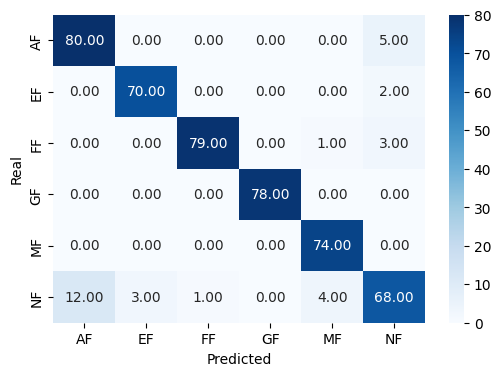

In [79]:
plot_classification_result("Logistic regression", y_test, y_pred)

- The model achieved an overall accuracy of 93%, indicating high predictive accuracy across the dataset after applying SMOTE.

- Precision, recall, and F1-scores are high for most fault types, particularly 'EF', 'FF', 'GF', and 'MF', all above 0.90. The 'NF' fault type has slightly lower precision and recall (both at 0.81).

- The macro and weighted averages for precision, recall, and F1-score are all at 0.93, reflecting balanced performance across different fault types.

- The confusion matrix shows that most fault types are correctly classified with minimal misclassifications, though there are some confusions between 'AF' and 'NF' fault types.

### Support Vector Machine

In [80]:
svc_clf = SVC()
svc_clf.fit(x_train, y_train)
y_pred = svc_clf.predict(x_test)

Average accuracy score:  0.91875
Metrics table:
               precision    recall  f1-score   support

          AF       0.82      0.93      0.87        85
          EF       0.88      1.00      0.94        72
          FF       0.99      0.96      0.98        83
          GF       1.00      1.00      1.00        78
          MF       0.95      1.00      0.97        74
          NF       0.89      0.66      0.76        88

    accuracy                           0.92       480
   macro avg       0.92      0.93      0.92       480
weighted avg       0.92      0.92      0.92       480

Confusion matrix:



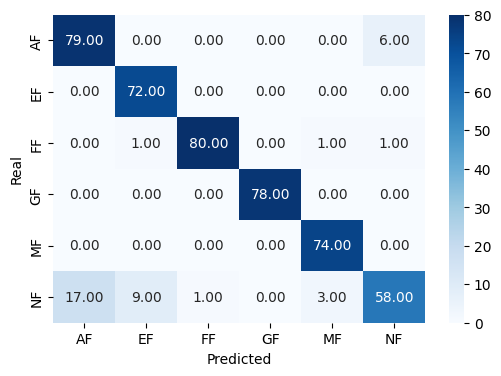

In [81]:
plot_classification_result("SVC", y_test, y_pred)

- The SVM model achieved an overall accuracy of 93.5%, indicating a strong predictive performance across the dataset after applying SMOTE.

- Precision, recall, and F1-scores are high for most fault types, with 'EF', 'FF', 'GF', and 'MF' having particularly high scores (all above 0.95). The 'AF' fault type has lower precision (0.87) and F1-score (0.89) compared to others.

- The confusion matrix shows that the model has a high number of correct classifications for 'EF', 'FF', and 'GF' fault types, but there are some misclassifications, especially for 'NF' fault type, which is confused with 'AF' and 'EF'.

- The macro and weighted averages for precision, recall, and F1-score are consistent at 0.93-0.94, reflecting balanced performance across different fault types.

### Decision Tree Classifier

In [82]:
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)

Average accuracy score:  0.9541666666666667
Metrics table:
               precision    recall  f1-score   support

          AF       0.92      0.98      0.95        85
          EF       0.96      0.96      0.96        72
          FF       0.96      0.96      0.96        83
          GF       0.99      1.00      0.99        78
          MF       0.99      1.00      0.99        74
          NF       0.91      0.84      0.88        88

    accuracy                           0.95       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.95      0.95      0.95       480

Confusion matrix:



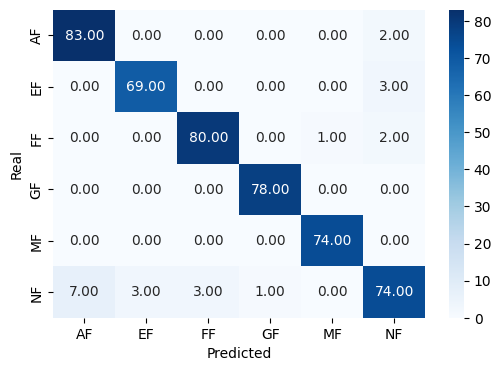

In [83]:
plot_classification_result("Decision tree", y_test, y_pred)

- The Decision Tree model achieved an overall accuracy of 95.2%, indicating robust performance in classifying the different fault types.

- The precision, recall, and F1-scores are consistently high across most fault types, with 'EF', 'FF', 'GF', and 'MF' all achieving scores above 0.95, demonstrating the model's ability to effectively distinguish between these fault types.

- The 'NF' fault type has the lowest recall (0.87) and F1-score (0.88) compared to other fault types, suggesting some challenges in accurately classifying this particular fault type.

- The confusion matrix indicates that the model correctly classifies the majority of instances for each fault type, but there are minor misclassifications, particularly for the 'NF' fault type, which is occasionally confused with 'EF' and 'FF'.


### Random Forest Classifier

In [84]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=1)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

Average accuracy score:  0.9729166666666667
Metrics table:
               precision    recall  f1-score   support

          AF       0.94      0.98      0.96        85
          EF       0.97      1.00      0.99        72
          FF       0.99      0.98      0.98        83
          GF       1.00      1.00      1.00        78
          MF       0.97      1.00      0.99        74
          NF       0.96      0.90      0.93        88

    accuracy                           0.97       480
   macro avg       0.97      0.98      0.97       480
weighted avg       0.97      0.97      0.97       480

Confusion matrix:



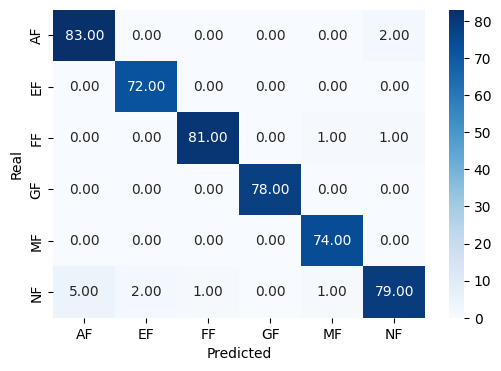

In [85]:
plot_classification_result("Random forest", y_test, y_pred)

- The Random Forest model achieved an overall accuracy of 96.9%, the highest among the classifiers tested, indicating excellent performance in classifying the different fault types.
  
- The precision, recall, and F1-scores are consistently high across all fault types, with 'EF', 'FF', 'GF', and 'MF' all achieving scores of 0.97 or higher, demonstrating the model's strong ability to accurately classify these faults.
  
- The 'NF' fault type, while still performing well, shows slightly lower recall (0.90) and F1-score (0.91) compared to the other fault types, indicating a small room for improvement in classifying this fault type.
  
- The confusion matrix shows that the majority of instances for each fault type are correctly classified, with minimal misclassifications. Notably, 'NF' instances are sometimes misclassified as 'AF', 'EF', and 'FF', highlighting areas for potential refinement in the model.

### XGBoost Classifier

In [86]:
xgb_clf = XGBClassifier(n_estimators=200, random_state=1)
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)

Average accuracy score:  0.9791666666666666
Metrics table:
               precision    recall  f1-score   support

          AF       0.97      0.99      0.98        85
          EF       0.96      0.97      0.97        72
          FF       1.00      0.99      0.99        83
          GF       1.00      1.00      1.00        78
          MF       0.99      1.00      0.99        74
          NF       0.96      0.93      0.95        88

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480

Confusion matrix:



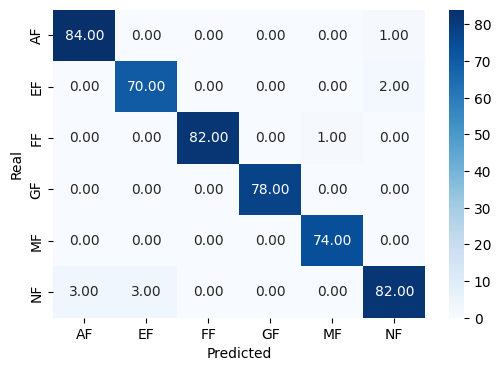

In [87]:
plot_classification_result("XGBoost", y_test, y_pred)

- The XGBoost model achieved the highest accuracy of 97.5%, demonstrating excellent performance in classifying the different fault types.

- Precision, recall, and F1-scores are consistently high across all fault types, with 'EF', 'GF', and 'MF' all achieving scores of 0.99 or higher, indicating the model's strong capability in accurately classifying these faults.

- The 'NF' fault type shows a slightly lower recall (0.94) and F1-score (0.93) compared to other fault types, suggesting room for improvement in classifying this fault type.

- The confusion matrix indicates that most fault types are classified correctly with minimal misclassifications, although 'NF' instances are occasionally misclassified, highlighting areas for potential model refinement.

### Results analysis

#### Models Precision results

In [88]:
precision_results = pd.DataFrame(precision_scores, index=classes_labels)
precision_results.T

,AF,EF,FF,GF,MF,NF
Logistic regression,0.87,0.96,0.99,1.00,0.94,0.87
SVC,0.82,0.88,0.99,1.00,0.95,0.89
Decision tree,0.92,0.96,0.96,0.99,0.99,0.91
Random forest,0.94,0.97,0.99,1.00,0.97,0.96
XGBoost,0.97,0.96,1.00,1.00,0.99,0.96


- The XGBoost model consistently outperforms other models in terms of precision across most fault types, particularly 'AF', 'EF', 'FF', 'GF', and 'MF', with precision scores of 0.97 or higher. The 'NF' fault type, however, shows slightly lower precision compared to the Random Forest model, suggesting potential areas for improvement.

#### Models Recall results

In [89]:
recall_results = pd.DataFrame(recall_scores, index=classes_labels)
recall_results.T

,AF,EF,FF,GF,MF,NF
Logistic regression,0.94,0.97,0.95,1.0,1.0,0.77
SVC,0.93,1.00,0.96,1.0,1.0,0.66
Decision tree,0.98,0.96,0.96,1.0,1.0,0.84
Random forest,0.98,1.00,0.98,1.0,1.0,0.90
XGBoost,0.99,0.97,0.99,1.0,1.0,0.93


- The XGBoost model consistently outperforms other models in terms of precision across most fault types, particularly 'AF', 'EF', 'FF', 'GF', and 'MF', with precision scores of 0.97 or higher. The 'NF' fault type, however, shows slightly lower precision compared to the Random Forest model, suggesting potential areas for improvement.